#  РАЗВЕДОЧНЫЙ АНАЛИЗ ДАННЫХ

Задачи, которые ставятся перед аналитиками, достаточно разнообразны. Однако всё начинается с данных - с "сырых" данных.

К сожалению, на практике данные в "сыром" виде обычно малопригодны для анализа. Процесс подготовки и очистки данных (препроцессинг, англ. data preparation, pre-processing, data cleaning) может быть весьма трудоёмким и по времени занимать больше, чем собственно построение и валидация моделей на основе данных. 

В результате получаем данные в удобном для анализа формате, как правило, табличном. Таблица (или датафрейм) имеет структуру "объекты-признаки": строки соответствуют отдельным сущностям (объектам, примерам, экземплярам), а столбцы - атрибутам этих сущностей (признакам).

Обычно работа аналитика при решении задач анализа данных начинается с разведочного анализа данных.

**Exploratory data analysis (EDA)** - это подход к анализу наборов данных для обобщения их основных характеристик, часто с использованием статистической графики и других методов визуализации данных.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Исследование основных характеристик датасета

Частично с этими функциями мы встречались на прошлых занятиях, давайте еще раз повторим.

## Текстовое описание набора данных

Затопление "Титаника" - одно из самых печально известных кораблекрушений в истории.

15 апреля 1912 года, во время своего первого рейса, широко известный “непотопляемый” корабль "Титаник" затонул после столкновения с айсбергом. К сожалению, на борту не хватило спасательных шлюпок для всех, что привело к гибели 1502 из 2224 пассажиров и членов экипажа.

Хотя в выживании был определенный элемент удачи, похоже, что у некоторых групп людей было больше шансов выжить, чем у других.

Используя данные о пассажирах (например, имя, возраст, пол, социально-экономический класс и т. д.) необходимо узнать "У каких людей было больше шансов выжить?”.

Каждая строчка набора данных содержит следующие поля:

- `PassengerId` — номер пассажира;

- `Survived` — выжил данный пассажир или нет (0 для умерших, 1 для выживших);

- `Pclass` — класс пассажира (1 — высший, 2 — средний, 3 — низший);

- `Name` — имя;

- `Sex` — пол;

- `Age` — возраст;

- `SibSp` — количество братьев, сестер, сводных братьев, сводных сестер, супругов на борту титаника;

- `Parch` — количество родителей, детей (в том числе приемных) на борту титаника;

- `Ticket` — номер билета;

- `Fare` — плата за проезд;

- `Cabin` — каюта;

- `Embarked` — порт посадки (C — Шербур; Q — Квинстаун; S — Саутгемптон).

## Загрузка датасета

Загрузим файлы датасета c помощью библиотеки [`Pandas`](https://pandas.pydata.org/).

In [ ]:
df = pd.read_csv("titanic.csv", sep=";")
df

## Исследование внешних признаков датасета

In [ ]:
print(df.shape)
print(f'Всего строк: {df.shape[0]}')
print(f'Всего колонок: {df.shape[1]}')

In [ ]:
df.columns

In [ ]:
df.dtypes

In [ ]:
df.info()

- значение Age не задано для большого количества записей. Из 891 строк, возраст Age задан лишь для 714 записей.
- каюты Cabin пропущены для большого количества записей. Только 204 из 891 записей содержат Cabin значения.

In [ ]:
for col in df.columns:
    print('{} - {}'.format(col, df[df[col].isnull()].shape[0]))

### Описательные статистики

[Кванти́ль](https://ru.wikipedia.org/wiki/%D0%9A%D0%B2%D0%B0%D0%BD%D1%82%D0%B8%D0%BB%D1%8C) — значение, которое заданная случайная величина не превышает с фиксированной вероятностью. Если вероятность задана в процентах, то квантиль называется процентилем или перцентилем:

$$P(X\le x_\alpha)\le\alpha$$

Основные характеристики датасета можно получить с помощью функции [`pandas.DataFrame.describe`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html). Она отобразит различные величины, такие как количество, среднее, среднеквадратичное отклонение и т.д. для численных типов данных. Это может быть полезным для понимания распределения значений по датасету и статистики, особенно когда нет возможности просмотреть все записи в виду огромного их количества.

Например, фраза "90-й процентиль массы тела у новорожденных мальчиков составляет 4 кг" означает, что 90 % мальчиков рождаются с весом меньше, либо равным 4 кг, а 10 % мальчиков рождаются с весом больше 4 кг.

Пусть $X_1, \ldots X_n$ — выборка.

В итоге получаем следующие стоки:

* `count` - количество non-NA/null наблюдений.
* `mean` - средняя значений в колонке $\overline{X}  = \frac1n \sum\limits_{i=1}^n X_i$ .
* `min` - минимальное значение в колонке $min(X_1, \ldots X_n)$.
* `25%` - 25-й перцентиль (0,25-квантиль называется первым (или нижним) кварти́лем (от лат. quarta — четверть)).
* `50%` - 50-й перцентиль (0,5-квантиль называется медианой (от лат. mediāna — середина) или вторым кварти́лем) $P(X\le x_{0.5})\le 0.5$.
* `75%` - 75-й перцентиль (0,75-квантиль называется третьим (или верхним) кварти́лем).
* `max` - максимальное значение в колонке $max(X_1, \ldots X_n)$.

In [ ]:
df.describe()

Если необходимо отобразить статистики объектного типа можно воспользоваться атрибутом `.describe(include = ['O'])`. Это нужно для нечисловых данных, когда нельзя просто посчитать максимумы/среднее/и пр. для данных. Мы можем отнести такие данные к категориальному виду.

In [ ]:
df.describe(include=['O'])

Что здесь можно увидеть интересного:

- видно, что сущесвуют дубликаты номеров билетов Ticket и переиспользуются каюты Cabins (уникальных записей (unique) меньше, чем общего количества). 
- самый большой порядок дубликата билета - "347082". Он повторился 7 раз. Две каюты занимают по 4 человека. Они используют каюты "B96 B98".
- 644 человека отбыли из порта "S".
- из 891 записей, 574 были мужчины (male).

Давайте проанализируем зависимости между разными данными по отношению к столбцу выживших(Survival), чтобы понять как разные признаки влияют на спасение. Чуть позже мы построим визуализации для более наглядного представления результатов.

#### 1. Правда ли, что пассажиры более высокого класса имеют большие шансы на спасение?

Посмотрим на распределение классов

In [ ]:
df['Pclass'].value_counts()

Произведем агрегирование данных, общая процедура для работы функции `groupby` такая: разделение-применение-объединение.

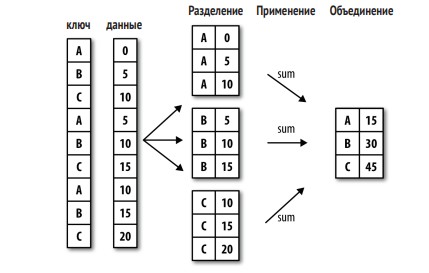

In [ ]:
df.groupby('Pclass')['Survived'].value_counts()

In [ ]:
df[['Pclass', 'Survived']].groupby('Pclass', as_index = False).mean()

#### 2. Правда ли, что женщины имеют большие шансы на спасение?

In [ ]:
df['Sex'].value_counts()

In [ ]:
df.groupby('Sex')['Survived'].value_counts()

In [ ]:
df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

#### 3. Правда ли, что дети имеют большие шансы на спасение?

In [ ]:
df['IsChild'] = [-1] * df.shape[0] 
df['IsChild'][df.Age < 20] = 1
df['IsChild'][df.Age >= 20] = 0

In [ ]:
df['IsChild'].value_counts()

In [ ]:
df[df['IsChild']!=-1].groupby('IsChild')['Survived'].value_counts(normalize=True)

#### 4. Cколько мужчин и женщин в каждом классе (Pclass)?

Воспользуемся функцией для создания таблиц сопряженности. Таблица сопряженности, или перекрестная таблица (cross-tabulation, или для краткости `crosstab`) – это пример сводной таблицы, в которой представлены групповые частоты.

In [ ]:
pd.crosstab(df['Pclass'], df['Sex'])

#### 5. Как обращались к мужчинам и женщинам в 1912?

In [ ]:
df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.')
df

In [ ]:
pd.crosstab(df['Title'], df['Sex'])

In [ ]:
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col', \
'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')

df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')
    
df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

### Корреляции признаков

Корреляция признаков позволяет оценить наличие линейных(монотонных) зависимостей между данными. Она бывают трех типов:
- Положительные значение = Положительные корреляция, т.е. возрастание по одному признаку соответсвует возрастанию по другому признаку и наоборот.
- Отрицательные значения = Обратные корреляции, т.е. возрастание по одному признаку, влечет уменьшение другого, и наоборот.
- Нулевые занчения =  линейных(монотонных) зависимостей между данными нет.

Если наша задача выявить связь между выжившими и их данными, то нам необходимо фокусироваться на тех признаках, которые имеют сильные положительные и отрицательные корреляции с признаком Survived.

Почему? Потому что это означает, что прогнозирование значения Survived имеет прямую зависимость с признакми с положительное корреляцией, и обратную - с отрицательными, т.о. если мы инвертируем обратные значения, то они тоже перейдут в разряд положительных корреляций.

In [ ]:
corr_matrix = df.corr()
corr_matrix

In [ ]:
corr_matrix.style.background_gradient(cmap='coolwarm')

# Визуализация

`Matplotlib` - это базовая библиотека для построения графиков и визуализации данных в Python. Если в `jupyter notebook` выполнить специальную магическую команду `%matplotlib inline`, то графики будут строиться в том же окне браузера. `matplotlib` позволяет строить двумерные графики практически всех нужных типов, с достаточно гибкой регулировкой их параметров; он также поддерживает основные типы трёхмерных графиков, но для серьёзной трёхмерной визуализации данных лучше пользоваться более мощными специализированными системами.

Ниже приведены несколько полезных ссылок:

[Официальная документация](https://matplotlib.org/stable/)

[50 оттенков matplotlib](https://habr.com/ru/post/468295/)

[Хороший tutorial](https://devpractice.ru/files/books/python/Matplotlib.book.pdf)


У функций в `matplotlib` много параметров.
Для того, чтобы посмотреть все параметры, можно воспользоваться справкой, например,

`plt.plot?`

In [ ]:
#plt.plot?

## Препарируем график

In [ ]:
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter


np.random.seed(19680801)

X = np.linspace(0.5, 3.5, 100)
Y1 = 3+np.cos(X)
Y2 = 1+np.cos(1+X/0.75)/2
Y3 = np.random.uniform(Y1, Y2, len(X))

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, aspect=1)


def minor_tick(x, pos):
    if not x % 1.0:
        return ""
    return "%.2f" % x

ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_formatter(FuncFormatter(minor_tick))

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.tick_params(which='major', width=1.0)
ax.tick_params(which='major', length=10)
ax.tick_params(which='minor', width=1.0, labelsize=10)
ax.tick_params(which='minor', length=5, labelsize=10, labelcolor='0.25')

ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

ax.plot(X, Y1, c=(0.25, 0.25, 1.00), lw=2, label="Blue signal", zorder=10)
ax.plot(X, Y2, c=(1.00, 0.25, 0.25), lw=2, label="Red signal")
ax.plot(X, Y3, linewidth=0,
        marker='o', markerfacecolor='w', markeredgecolor='k')

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("X axis label")
ax.set_ylabel("Y axis label")

ax.legend( loc='upper right')


def circle(x, y, radius=0.15):
    from matplotlib.patches import Circle
    from matplotlib.patheffects import withStroke
    circle = Circle((x, y), radius, clip_on=False, zorder=10, linewidth=1,
                    edgecolor='black', facecolor=(0, 0, 0, .0125),
                    path_effects=[withStroke(linewidth=5, foreground='w')])
    ax.add_artist(circle)


def text(x, y, text):
    ax.text(x, y, text, backgroundcolor="white",
            ha='center', va='top', weight='bold', color='blue')


# Minor tick
circle(0.50, -0.10)
text(0.50, -0.32, "Minor tick label")

# Major tick
circle(-0.03, 4.00)
text(0.03, 3.80, "Major tick")

# Minor tick
circle(0.00, 3.50)
text(0.00, 3.30, "Minor tick")

# Major tick label
circle(-0.15, 3.00)
text(-0.15, 2.80, "Major tick label")

# X Label
circle(1.80, -0.27)
text(1.80, -0.45, "X axis label")

# Y Label
circle(-0.27, 1.80)
text(-0.27, 1.6, "Y axis label")

# Title
circle(1.60, 4.13)
text(1.60, 3.93, "Title")

# Blue plot
circle(1.75, 2.80)
text(1.75, 2.60, "Line\n(line plot)")

# Red plot
circle(1.20, 0.60)
text(1.20, 0.40, "Line\n(line plot)")

# Scatter plot
circle(3.20, 1.75)
text(3.20, 1.55, "Markers\n(scatter plot)")

# Grid
circle(3.00, 3.00)
text(3.00, 2.80, "Grid")

# Legend
circle(3.70, 3.80)
text(3.70, 3.60, "Legend")

# Axes
circle(0.5, 0.5)
text(0.5, 0.3, "Axes")

# Figure
circle(-0.3, 0.65)
text(-0.3, 0.45, "Figure")

color = 'blue'
ax.annotate('Spines', xy=(4.0, 0.35), xycoords='data',
            xytext=(3.3, 0.5), textcoords='data',
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.annotate('', xy=(3.15, 0.0), xycoords='data',
            xytext=(3.45, 0.45), textcoords='data',
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.text(4.0, -0.4, "Made with http://matplotlib.org",
        fontsize=10, ha="right", color='.5')

plt.show()

## Простейший график

Благодаря **Numpy** у нас всегда есть материалы в виде массивов чисел. 

Создадим ряд чисел одно за другим, подобно линии, с помощью команды `np.linspace()`

Числа равномерно распределяются в интервале от **0** до **15** (это будут первые два значения в скобках). А всего чисел в ряде будет **100** (третье значение в скобках). Рассмотрим подробнее:


In [ ]:
x = np.linspace(0, 15, 100)
print(x)

Теперь это точки для построения графика синуса (значения по оси x). Для вычисления значений синуса (значений по оси y) вызовем `np.sin(x)`, где **x** – массив значений по горизонтали. При этом получится массив значений синуса, каждое из которых будет вычислено от аргумента на том же месте в массиве **x**.

In [ ]:
y = np.sin(x) 
# Содержимое массива у выглядит так:
print(y) 

**Как бы вы построили график, если у вас есть точки и для x, и для y?**

Наверное, вы бы начертили две пересекающиеся линии, которые перпендикулярны (декартовы оси). Потом отметили место их пересечения как начало отсчета или «ноль». Потом решили, что вертикальная линия – это ваша ось **y**, горизонтальная – ось **x**, и начали бы поочередно наносить точки из массивов **x** и **y**, которые вы уже получили. Так бы получился график `sin(x)`, верно? 

Теперь это можно сделать за пару действий:

In [ ]:
plt.plot(x, y)                                # Отрисовка графика командой plot(), в которую переданы массивы точек для x и y
plt.show()                                    # С помощью .show() выводится график

Если вам необходимо добавить на график подписи, то это в разы легче, чем написать их в тетради.

В этом вам помогут дополнительные команды:

In [ ]:
plt.plot(x, y)                                # Отрисовка того же графика
plt.title("y=sin(x)")                         # Команда .title() - и график подписан указанным в скобках именем
plt.xlabel('Переменная X')                    # Команда .xlabel() добавит надпись только для оси x
plt.ylabel('Переменная Y')                    # А команда .ylabel() добавит надпись для оси y
plt.show()                                    # Фиксация результата и вывод - командой .show()

Также вы можете сделать график удобного для вас размера. Пространство, где он рисуется, называется полотном графика. Для указания размера полотна используйте команду `.figure()`. Не забудьте указать в скобках слово-параметр **figsize=** и в кортеже сами размеры для вашего графика:

In [ ]:
plt.figure(figsize=(10, 5))                   # И вот - размер полотна в дюймах указан
                                              # Первое число 10 - по оси x, второе число 5 - по оси y 

Несложно нарисовать и больше одного графика на одном и том же полотне. У вас часто будет возникать такая необходимость. Для этого продолжайте использовать команду `.plot()`. Не забудьте указать слегка видоизмененные данные, чтобы графики не перекрывали друг друга. Здесь используем обычную функцию из значений `cos(x)/2`, которая имеется в **Numpy**:

In [ ]:
plt.plot(x, y, label='sin(x)')                # Параметр label поможет подписать кривую графика (см. далее)
plt.plot(x, np.cos(x)/2, label='cos(x)/2')    # А так добавляется еще один график на полотно

In [ ]:
plt.figure(figsize=(10, 5))                   # Здесь задаётся размер полотна в дюймах
                                              # по оси x и y соответственно

plt.plot(x, y, label='sin(x)')                # Эта команда строит график, а параметр label задает подпись кривой
plt.plot(x, np.cos(x)/2, label='cos(x)/2')    # Эта команда строит еще один график cos(x) на полотне

plt.title("y = sin(x)")                       # Заголовок графика
plt.xlabel('Переменная X')                    # Надпись для оси x
plt.ylabel('Переменная Y')                    # Надпись для оси y

plt.legend()                                  # команда для "легенды" - legend()
                                              # Она позволяет отобразить подписи кривых, указанные в .plot(label=)

plt.grid()                                    # команда grid(), чтобы отрисовать сетку на фоне

plt.show()                                    # Команда для воплощения графика в жизнь 

А теперь красивый график

In [ ]:
plt.figure(figsize=(14, 7))                   # Задание размера полотна в дюймах

plt.plot(x,y , label='sin(x)', color='#4b0082', linewidth=4,
         marker='h', markerfacecolor='lightgreen', markeredgewidth=2,
         markersize=10, markevery=5)

plt.plot(x, np.cos(x)/2, label='cos(x)/2', linewidth=3, color='lightcoral',
         marker='D', markeredgecolor='black', markevery=5)

plt.title('y = sin(x)')                       # Заголовок графика
plt.xlabel('Переменная X')                    # Надпись для оси x
plt.ylabel('Переменная Y')                    # Надпись для оси y

plt.legend()                                  # Отрисовка названий графиков ("легенды")

plt.grid()                                    # Отрисовка сетки

plt.show()                                    # Вывод графика

Некоторые параметры, которые использовались выше в скобках команд:
- **marker** – тип маркера;
- **color** – цвет линии;
- **mec** – цвет маркера;
- **linestyle** – стиль линии;
- **label** – подпись кривой графика;
- **linewidth** – ширина линии;
- **markersize** – размер маркера.

Другие команды вы найдете в полном описании документации **Matplotlib**. Описанные там элементы стиля дают возможность существенно улучшить наглядность графика.


# Визуальный анализ данных

Давайте на практике остроим разные графики разведочного анализа данных для набора Титаника.

In [ ]:
df.head()

Визуализируем пропуски

In [ ]:
#!pip install missingno #установка новой библиотеки
import missingno #подключение новой библиотеки
missingno.matrix(df)

### Сколько выживших?

In [ ]:
f, ax=plt.subplots(1,2,figsize=(18,8)) # одна строка и два столбца графиков
df['Survived'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Выжившие')
ax[0].set_ylabel('')
df['Survived'].value_counts().plot.bar(ax=ax[1])
ax[1].set_title('Выжившие')
plt.show()

### Категориальные переменные

Категориальные переменные - переменные, значения которых являются некоторыми категориями. К примеру, пол - это категориальная переменная, которая имеет два возможных значения (мужчина и женщина). Такие переменные не нельзя отсортировать или задать для них порядок. Ещё такие признаки называют качественными.

**Столбчатая диаграмма** - методы `plot.bar()` и `plot.barh()` строят вертикальные и горизонтальные столбчатые диаграммы. В этом случае индексы объектов `Series` и `DataFrame` используются в качестве меток на оси `x` (`bar`) или `y` (`barh`).

In [ ]:
def bar_plot(variable):
 
    # получаем переменные
    var = df[variable]
    # считаем количество значений для категириальной переменной
    varValue = var.value_counts()
    
    # визуализируем
    plt.figure(figsize = (10,5))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Частота")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable, varValue))

In [ ]:
category = ["Survived","Sex","Pclass","Embarked","SibSp", "Parch"]
for c in category:
    bar_plot(c)

### Пол

In [ ]:
df.groupby(['Sex','Survived'])['Survived'].count()

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x=df['Sex'], hue=df['Survived'], ax=ax[1])
ax[1].set_title('Распределение выживших по полу')
plt.show()

Мужчин на борту было ощутимо больше чем женщин. И всё же количество спасшихся женщин почти в двое больше спасшихся мужчин. Процент выживаемости для женщин около 75%, в то время как для мужчин он составляет примерно 18-19%.

### Pclass 

In [ ]:
pd.crosstab(df.Pclass,df.Survived,margins=True).style.background_gradient(cmap='summer_r')

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Количество пассажиров различных классов')
ax[0].set_ylabel('Количество')
sns.countplot(x=df['Pclass'],hue=df['Survived'],ax=ax[1])
ax[1].set_title('Распределение выживших по классу')
plt.show()

Но как мы видим у пассажиров первого класса было на много больше шансов на спасение. Хотя в третьем классе и было куда больше пассажиров выживших среди них не много, спаслись примерно 25%. Из пассажиров первого класса спаслись примерно 63%, из пассажиров второго класса примерно 48%.

## Числовые переменные

**Гистограмма плотности распределения** — это столбиковая диаграмма, которая показывает, как данные распределяются по группам значений. Собранные данные представляют в виде ряда прямоугольников, одинаковых по ширине и различающихся по высоте. Анализ характера изменения высот позволяет оценить динамику процесса.

Ось Y показывает с какой вероятностью случайно выбранное значение из ряда будет принадлежать определенному интервалу.

In [ ]:
def plot_hist(variable):
    plt.figure(figsize = (10,5))
    plt.hist(df[variable], bins = 50, color='green', density=True)
    plt.xlabel(variable)
    plt.ylabel("Частота")
    plt.title("Распределение переменной {}".format(variable))
    plt.show()

In [ ]:
numeric = ["Fare", "Age","PassengerId"]
for n in numeric:
    plot_hist(n)

**Диаграмма рассеяния** - еще один часто используемый тип графика является простой точечный график, близкий родственник линейного графика. Вместо того, чтобы точки соединялись отрезками линий, здесь точки представлены по отдельности точкой, кругом или другой формой. Позволяет построить распределение двух колонок данных и визуально обнаружить наличие зависимости. Не предполагается, что значения упорядочены (например, по времени).

Построим график зависмости стоимости билета от возраста. Можно ли увидеть какую-либо зависимость?

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = df['Age'], y = df['Fare'])
plt.xlabel("Возраст")
plt.ylabel("Цена билета")
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.scatter(df[df["Survived"]==1]["Age"], df[df["Survived"]==1]["Fare"], c="blue", alpha=0.5)
ax.scatter(df[df["Survived"]==0]["Age"], df[df["Survived"]==0]["Fare"], c="green", alpha=0.5)

ax.set_xlabel("Возраст")
ax.set_ylabel("Цена билета")


ax.legend(handles=color_patches)

fig.suptitle("Выживаемость пассажиров в зависимости от возраста и стоимости билета");

[**Box plot**](https://ru.wikipedia.org/wiki/Ящик_с_усами) &mdash; график, использующийся в описательной статистике, компактно изображающий одномерное распределение вероятностей.

Такой вид диаграммы в удобной форме показывает медиану (или, если нужно, среднее), нижний и верхний квартили, минимальное и максимальное значение выборки и выбросы. Несколько таких ящиков можно нарисовать бок о бок, чтобы визуально сравнивать одно распределение с другим; их можно располагать как горизонтально, так и вертикально. Расстояния между различными частями ящика позволяют определить степень разброса (дисперсии) и асимметрии данных и выявить выбросы.

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.boxplot(x = 'Pclass', y = 'Age', hue = 'Survived', data = df, palette = 'flare', ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.boxplot(x = 'Sex', y = 'Age', hue = 'Survived', data = df, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()
f.savefig('saved_figure-100pi.png', dpi = 100) # сохранение графика

1) Число детей увеличивается с классом и показатель выживаемости для пассажиров младше 10 лет (т. е. детей) выглядит неплохим не зависимо от класса.

2) Шансы выжить для пассажиров в возрасте от 20 до 50 лет из первого класса довольно высокие и ещё выше для женщин.

3) Для мужчин шанс выжить понижается с повышением возраста.

### Тепловая карта корреляций

In [ ]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(), vmax=0.6, square=True, annot=True)

### Парные диаграммы

Комбинация гистограмм и диаграмм рассеивания для всего набора данных. Выводится матрица графиков. На пересечении строки и столбца, которые соответствуют двум показателям, строится диаграмма рассеивания. В главной диагонали матрицы строятся гистограммы распределения соответствующих показателей.

In [ ]:
sns.pairplot(df)